    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0  

C:\Users\USER\AppData\Local\Temp\ipykernel_25292\2827623882.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경


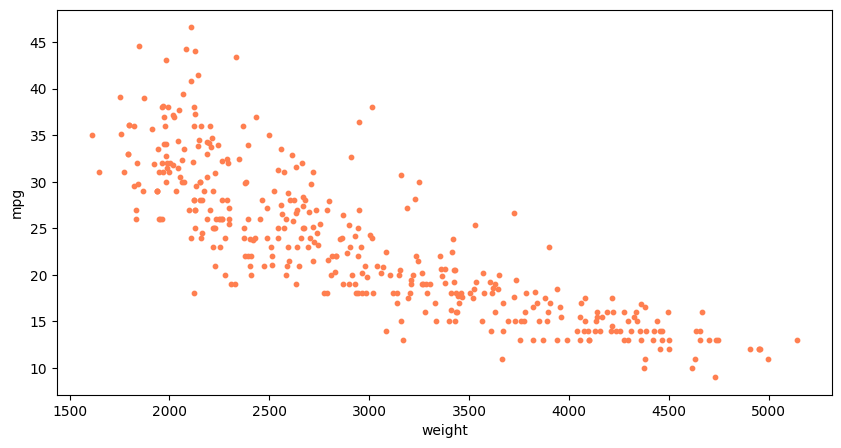

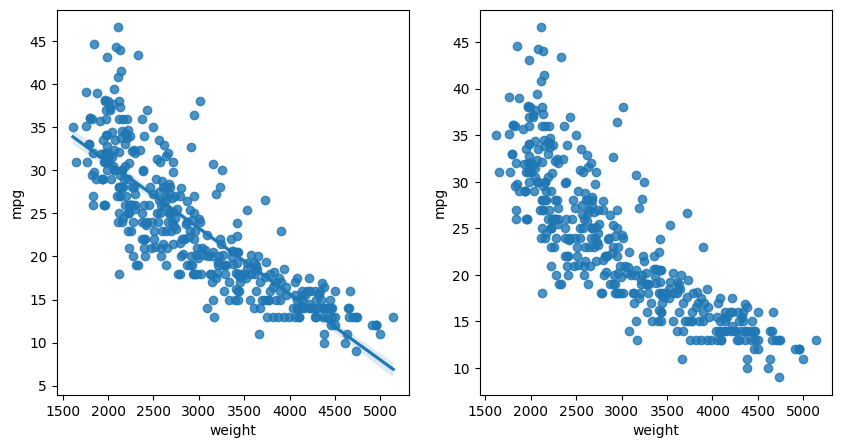

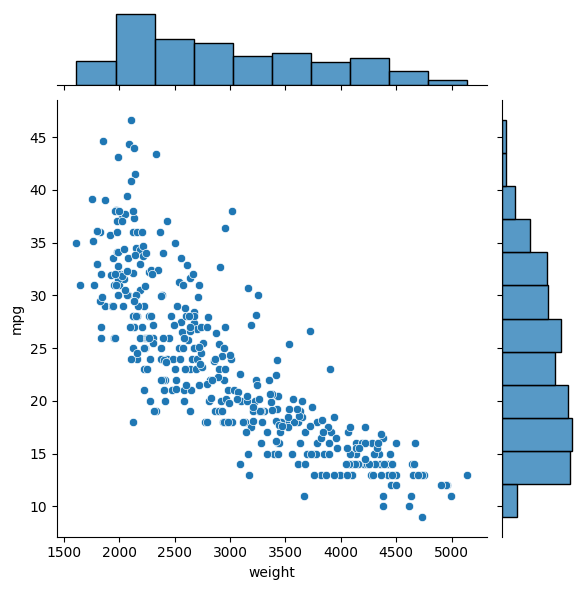

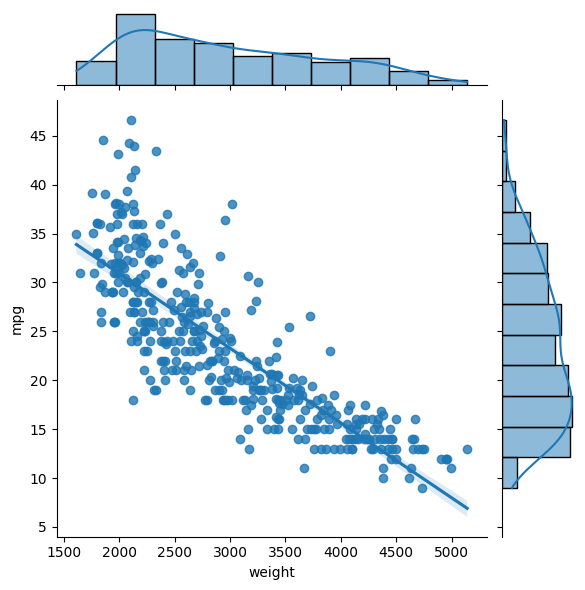

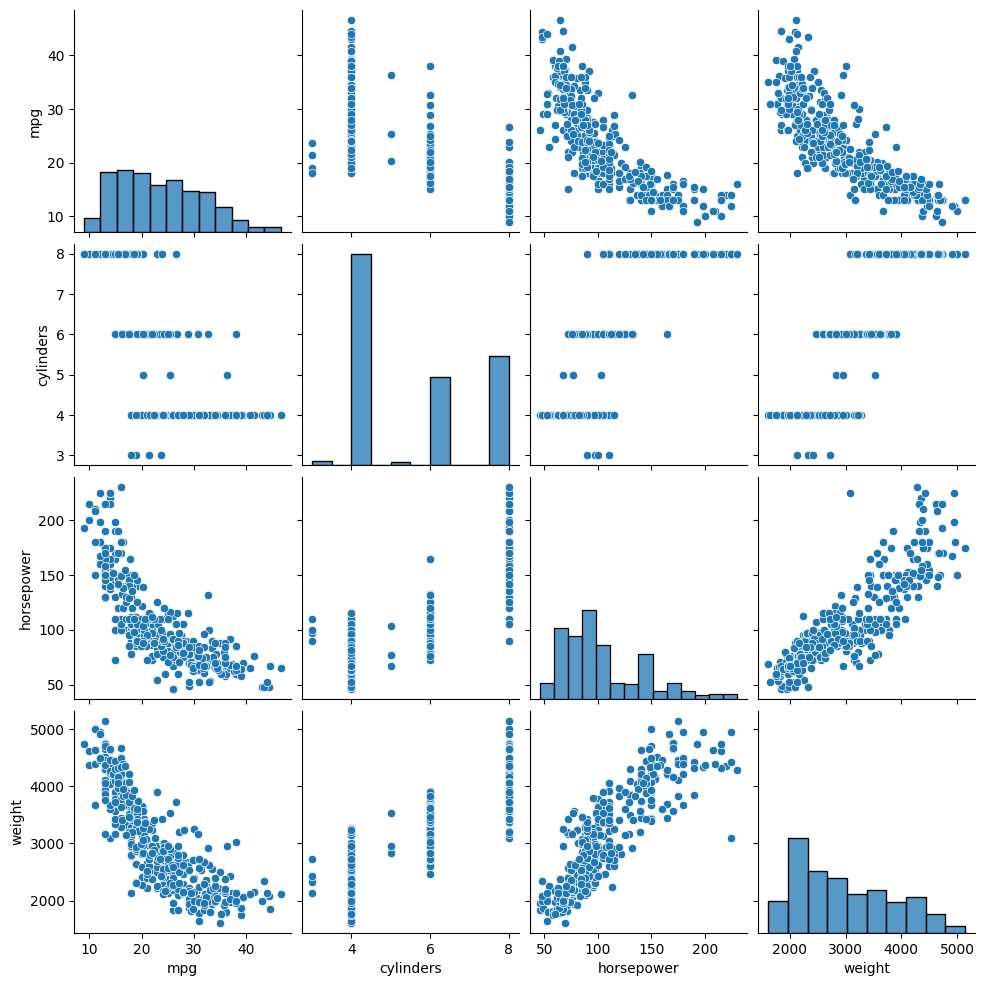

train data 개수:  274
test data 개수:  118
0.6822458558299325


기울기 a:  [-0.00775343]


y절편 b 46.7103662572801




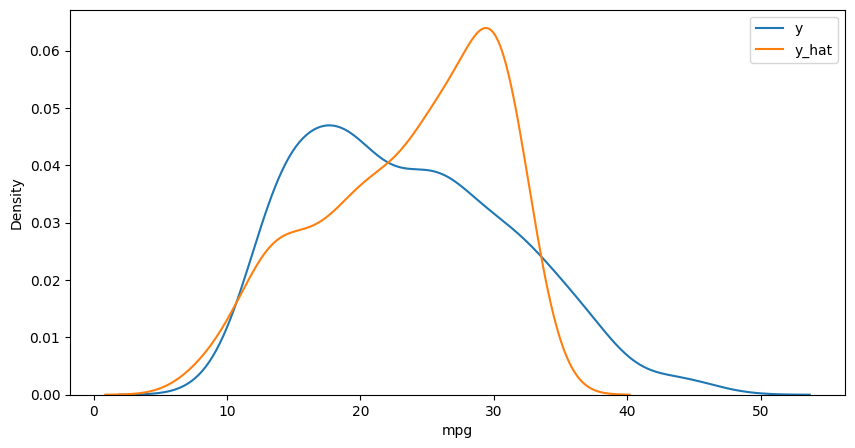

In [1]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv(r'C:\Users\USER\Downloads\5674-833_4th\part7\auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# 데이터 살펴보기
print(df.head())   
print('\n')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)
print(df.head())   
print('\n')


'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
print(df.info())  
print('dpinfo 출력완료\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

# horsepower 열의 자료형 변경 (문자열 ->숫자)
print(df['horsepower'].unique())          # horsepower 열의 고유값 확인
print('\n')

df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

print(df.describe())                                     # 데이터 통계 요약정보 확인
print('\n')


'''
[Step 3] 속성(feature 또는 variable) 선택
'''

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())   
print('\n')

### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()

# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)                 # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)  #회귀선 미표시
plt.show()
plt.close()

# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)              # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)  # 회귀선 표시
plt.show()
plt.close()

# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)  
plt.show()
plt.close()


'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']       #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))


'''
Step 5: 단순회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b', lr.intercept_)
print('\n')

# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()